In [2]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [3]:
app = Flask(__name__)

In [4]:
playstore = pd.read_csv('data\googleplaystore.csv')

In [5]:
playstore.drop_duplicates(subset = 'App', keep='first', inplace=True) 

In [6]:
playstore.drop([10472], inplace=True)

In [7]:
playstore.Category = playstore.Category.astype("category")

In [8]:
playstore.Installs = playstore.Installs.apply(lambda x: x.replace("+",""))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace(",",""))

In [9]:
playstore.Installs = playstore.Installs.astype("int64")

In [10]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)

In [11]:
playstore.Price = playstore.Price.apply(lambda x: x.replace("$",""))
playstore.Price = playstore.Price.astype("float")

In [12]:
playstore[['Reviews','Size','Installs']] = playstore[['Reviews','Size','Installs']].astype('int64')

In [13]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13134701,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [14]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             9659 non-null   object  
 1   Category        9659 non-null   category
 2   Rating          8196 non-null   float64 
 3   Reviews         9659 non-null   int64   
 4   Size            9659 non-null   int64   
 5   Installs        9659 non-null   int64   
 6   Type            9658 non-null   object  
 7   Price           9659 non-null   float64 
 8   Content Rating  9659 non-null   object  
 9   Genres          9659 non-null   object  
 10  Last Updated    9659 non-null   object  
 11  Current Ver     9651 non-null   object  
 12  Android Ver     9657 non-null   object  
dtypes: category(1), float64(2), int64(3), object(7)
memory usage: 991.9+ KB


In [15]:
playstore['Content Rating'].value_counts().sort_values(ascending=True)

Unrated               2
Adults only 18+       3
Everyone 10+        322
Mature 17+          393
Teen               1036
Everyone           7903
Name: Content Rating, dtype: int64

In [16]:
df2 = playstore.copy()
top_category = pd.crosstab(index=df2['Category'],columns='Jumlah',values=df2['App'], aggfunc='count').sort_values('Jumlah',ascending=False).reset_index()

In [17]:
top_category.head(10)

col_0,Category,Jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [28]:

rev_table = df2[["Category","App","Reviews","Rating"]].groupby(["Category","App"]).agg({'Reviews' : 'sum', 'Rating':'mean'}). \
sort_values(['Reviews','Category'],ascending=False).reset_index(). \
head(10)

In [19]:
rev_table

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306.0,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316.0,4.4
2,SOCIAL,Instagram,66577313.0,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847.0,4.0
4,GAME,Clash of Clans,44891723.0,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526.0,4.7
6,GAME,Subway Surfers,27722264.0,4.5
7,VIDEO_PLAYERS,YouTube,25655305.0,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0,4.7
9,GAME,Clash Royale,23133508.0,4.6


In [20]:
cat_order = df2.groupby("Category").agg({'App' : 'count'}).rename({'Category':'Total'}, axis=1).sort_values('App',ascending=False).head()
X = cat_order.reset_index().Category
Y = cat_order.reset_index().App
my_colors = 'rgbkymc'

In [21]:
cat_order

,App
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395


In [22]:
df2['Content Rating'] = df2['Content Rating'].astype('category')

In [23]:
df2['Revenue'] = df2['Price']*df2['Installs']
df2.sort_values(by="Revenue",ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
2241,Minecraft,FAMILY,4.5,2376564,27187987,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,69900000.0
5351,I am rich,LIFESTYLE,3.8,3547,1800000,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,1867,4700000,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,19999500.0
4034,Hitman Sniper,GAME,4.6,408292,29000000,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,9900000.0
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26000000,1000000,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,6990000.0


In [24]:
df2[['Content Rating','Price']].sort_values(by='Price',ascending=False)

,Content Rating,Price
4367,Everyone,400.00
9934,Everyone,399.99
5359,Everyone,399.99
5358,Everyone,399.99
5373,Everyone,399.99
...,...,...
4078,Everyone,0.00
4079,Everyone,0.00
4080,Everyone,0.00
4081,Everyone,0.00


In [25]:
revenue = df2[['Content Rating', 'Installs', 'Revenue']].groupby(['Content Rating']).agg({'Installs' : 'sum', 'Revenue': 'sum'}).\
sort_values(by="Revenue", ascending=False).round(0)
revenue

,Installs,Revenue
Content Rating,,
Everyone,52179352961,175437470.0
Everyone 10+,4016271795,80326055.0
Mature 17+,2437986878,18903485.0
Teen,16487275393,16481448.0
Adults only 18+,2000000,0.0
Unrated,50500,0.0


In [26]:
label = revenue.reset_index()['Content Rating']
data1 = revenue.reset_index()['Installs']
data = revenue.reset_index()['Revenue'] / 1000000
width=0.3

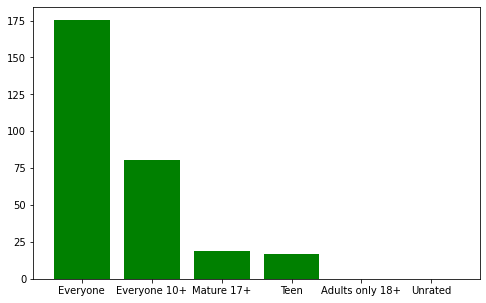

In [27]:
fig = plt.figure(figsize=(8,5))
fig.add_subplot()
plt.bar(label,data,color='green')
plt.show()